<a href="https://colab.research.google.com/github/Mainabryan/SWISS-CLOTHING-BRAND/blob/main/Swiss_clothing_brand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Load the dataet

In [ ]:
import pandas as pd

# Load the CSV files with corrected variable names
customer_table = pd.read_csv('/content/customer_table-sheet1-sourcetable.csv')
employee_table = pd.read_csv('/content/employee_table-sheet1-sourcetable.csv')
product_table = pd.read_csv('/content/product_table-sheet1-sourcetable.csv')
inventory_restock_table = pd.read_csv('/content/inventory_restock-sheet1-sourcetable.csv')
sales_table = pd.read_csv('/content/sales_table-sheet1-sourcetable.csv')
marketing_table = pd.read_csv('/content/marketing_table-sheet1-sourcetable.csv')

# Verify loading by printing the first few rows of each table
print("Customers Table:")
print(customer_table.head())
print("\nEmployees Table:")
print(employee_table.head())
print("\nProducts Table:")
print(product_table.head())
print("\nInventory Restock Table:")
print(inventory_restock_table.head())
print("\nSales Table:")
print(sales_table.head())
print("\nMarketing Table:")
print(marketing_table.head())

FileNotFoundError: [Errno 2] No such file or directory: '/content/customer_table-sheet1-sourcetable.csv'

##import librabries

In [ ]:
# Core libraries for data manipulation and analysis
import pandas as pd  # For loading and manipulating CSV data
import numpy as np   # For numerical operations

# Libraries for data visualization
import matplotlib.pyplot as plt  # For plotting charts
import seaborn as sns           # For enhanced visualizations

# Libraries for machine learning (optional, depending on your project needs)
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import StandardScaler      # For scaling features
from sklearn.linear_model import LinearRegression     # Example ML model
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation

# Optional: For statistical analysis
import statsmodels.api as sm  # For detailed statistical modeling

# Optional: For handling dates and times
from datetime import datetime  # For parsing and manipulating dates

##Data Cleaning and ixing the errors

In [ ]:
# Check for missing values
print("Missing Values in Each Table:")
print("Customers:", customer_table.isnull().sum())
print("Employees:", employee_table.isnull().sum())
print("Products:", product_table.isnull().sum())
print("Inventory Restock:", inventory_restock_table.isnull().sum())
print("Sales:", sales_table.isnull().sum())
print("Marketing:", marketing_table.isnull().sum())

##EDA

In [ ]:
# Convert date columns to datetime
sales_table['Date'] = pd.to_datetime(sales_table['Date'])
inventory_restock_table['Restock_Date'] = pd.to_datetime(inventory_restock_table['Restock_Date'])
marketing_table['Start_Date'] = pd.to_datetime(marketing_table['Start_Date'])
marketing_table['End_Date'] = pd.to_datetime(marketing_table['End_Date'])

# Ensure ID columns are integers
customer_table['Customer_ID'] = customer_table['Customer_ID'].astype(int)
product_table['Product_ID'] = product_table['Product_ID'].astype(int)
sales_table['Sale_ID'] = sales_table['Sale_ID'].astype(int)
sales_table['Product_ID'] = sales_table['Product_ID'].astype(int)
sales_table['Customer_ID'] = sales_table['Customer_ID'].astype(int)
sales_table['Employee_ID'] = sales_table['Employee_ID'].astype(int)
inventory_restock_table['Restock_ID'] = inventory_restock_table['Restock_ID'].astype(int)
inventory_restock_table['Product_ID'] = inventory_restock_table['Product_ID'].astype(int)
marketing_table['Campaign_ID'] = marketing_table['Campaign_ID'].astype(int)

# Verify data types
print("Sales Table Data Types:")
print(sales_table.dtypes)

##Informtation

In [ ]:
# Check basic info
print("Customers Table Info:")
print(customer_table.info())
print("\nEmployees Table Info:")
print(employee_table.info())
print("\nProducts Table Info:")
print(product_table.info())
print("\nInventory Restock Table Info:")
print(inventory_restock_table.info())
print("\nSales Table Info:")
print(sales_table.info())
print("\nMarketing Table Info:")
print(marketing_table.info())


##INCREASE SALES

In [ ]:
#Top 10
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Best-Selling Products", fontsize=14, weight='bold')
plt.xlabel("Total Sales (CHF)")
plt.ylabel("Product ID")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the Sales and Products tables (adjust file paths as needed)
sales_table = pd.read_csv('/content/sales_table-sheet1-sourcetable.csv')
product_table = pd.read_csv('/content/product_table-sheet1-sourcetable.csv')

# Filter out returns (negative quantities) and group by Product_ID to sum quantities
sales_positive = sales_table[sales_table['Quantity'] > 0]
product_sales = sales_positive.groupby('Product_ID')['Quantity'].sum().reset_index()

# Merge with Products table to get product details
product_sales = product_sales.merge(product_table[['Product_ID', 'Product_Name', 'Category', 'Selling_Price_CHF']],
                                  on='Product_ID', how='left')

# Sort by total quantity sold in descending order and get top 10
top_10_products = product_sales.sort_values(by='Quantity', ascending=False).head(10)

# Add total revenue (Quantity * Selling_Price_CHF - Discount_CHF) for context
top_10_products = top_10_products.merge(
    sales_positive.groupby('Product_ID')[['Total_Price_CHF']].sum().reset_index(),
    on='Product_ID', how='left'
)

# Rename columns for clarity
top_10_products.columns = ['Product_ID', 'Total_Units_Sold', 'Product_Name', 'Category',
                          'Selling_Price_CHF', 'Total_Revenue_CHF']

# Display the result
print("Top 10 Products Sold:")
print(top_10_products[['Product_ID', 'Product_Name', 'Category', 'Total_Units_Sold', 'Total_Revenue_CHF']])

In [ ]:
import pandas as pd

# Load the Sales and Products tables (adjust file paths as needed)
sales_table = pd.read_csv('/content/sales_table-sheet1-sourcetable.csv')
product_table = pd.read_csv('/content/product_table-sheet1-sourcetable.csv')

# Filter out returns (negative quantities) and group by Product_ID to sum quantities
sales_positive = sales_table[sales_table['Quantity'] > 0]
product_sales = sales_positive.groupby('Product_ID')['Quantity'].sum().reset_index()

# Merge with Products table to get product details
product_sales = product_sales.merge(product_table[['Product_ID', 'Product_Name', 'Category']],
                                  on='Product_ID', how='left')

# Sort by total quantity sold and get top 10
top_10_products = product_sales.sort_values(by='Quantity', ascending=False).head(10)

# Rename columns for clarity
top_10_products.columns = ['Product_ID', 'Total_Units_Sold', 'Product_Name', 'Category']

# Print the data for reference
print("Top 10 Products Sold:")
print(top_10_products[['Product_ID', 'Product_Name', 'Category', 'Total_Units_Sold']])

In [ ]:
import pandas as pd

# Load the Sales and Products tables (adjust file paths as needed)
sales_table = pd.read_csv('/content/sales_table-sheet1-sourcetable.csv')
product_table = pd.read_csv('/content/product_table-sheet1-sourcetable.csv')

# Filter out returns (negative quantities) and group by Product_ID to sum quantities
sales_positive = sales_table[sales_table['Quantity'] > 0]
product_sales = sales_positive.groupby('Product_ID')['Quantity'].sum().reset_index()

# Merge with Products table to get product details
product_sales = product_sales.merge(product_table[['Product_ID', 'Product_Name', 'Category', 'Selling_Price_CHF']],
                                  on='Product_ID', how='left')

# Sort by total quantity sold in descending order and get top 10
top_10_products = product_sales.sort_values(by='Quantity', ascending=False).head(10)

# Add total revenue (Quantity * Selling_Price_CHF - Discount_CHF) for context
top_10_products = top_10_products.merge(
    sales_positive.groupby('Product_ID')[['Total_Price_CHF']].sum().reset_index(),
    on='Product_ID', how='left'
)

# Rename columns for clarity
top_10_products.columns = ['Product_ID', 'Total_Units_Sold', 'Product_Name', 'Category',
                          'Selling_Price_CHF', 'Total_Revenue_CHF']

# Display the result
print("Top 10 Products Sold:")
print(top_10_products[['Product_ID', 'Product_Name', 'Category', 'Total_Units_Sold', 'Total_Revenue_CHF']])

In [ ]:
import pandas as pd

# Load the Sales and Products tables (adjust file paths as needed)
sales_table = pd.read_csv('/content/sales_table-sheet1-sourcetable.csv')
product_table = pd.read_csv('/content/product_table-sheet1-sourcetable.csv')

# Filter out returns (negative quantities) and group by Product_ID to sum quantities
sales_positive = sales_table[sales_table['Quantity'] > 0]
product_sales = sales_positive.groupby('Product_ID')['Quantity'].sum().reset_index()

# Merge with Products table to get product details
product_sales = product_sales.merge(product_table[['Product_ID', 'Product_Name', 'Category', 'Selling_Price_CHF']],
                                  on='Product_ID', how='left')

# Sort by total quantity sold in descending order and get top 10
top_10_products = product_sales.sort_values(by='Quantity', ascending=False).head(10)

# Add total revenue (Quantity * Selling_Price_CHF - Discount_CHF) for context
top_10_products = top_10_products.merge(
    sales_positive.groupby('Product_ID')[['Total_Price_CHF']].sum().reset_index(),
    on='Product_ID', how='left'
)

# Rename columns for clarity
top_10_products.columns = ['Product_ID', 'Total_Units_Sold', 'Product_Name', 'Category',
                          'Selling_Price_CHF', 'Total_Revenue_CHF']

# Display the result
print("Top 10 Products Sold:")
print(top_10_products[['Product_ID', 'Product_Name', 'Category', 'Total_Units_Sold', 'Total_Revenue_CHF']])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Sales and Products tables
sales_table = pd.read_csv('/content/sales_table-sheet1-sourcetable.csv')
product_table = pd.read_csv('/content/product_table-sheet1-sourcetable.csv')

# Filter out returns (negative quantities)
sales_positive = sales_table[sales_table['Quantity'] > 0]

# Group by Product_ID and sum total quantity sold
product_sales = sales_positive.groupby('Product_ID')['Quantity'].sum().reset_index()

# Merge with product details
product_sales = product_sales.merge(
    product_table[['Product_ID', 'Product_Name', 'Category', 'Selling_Price_CHF']],
    on='Product_ID', how='left'
)

# Sort by total quantity sold and get top 10
top_10_products = product_sales.sort_values(by='Quantity', ascending=False).head(10)

# Add total revenue for context
top_10_products = top_10_products.merge(
    sales_positive.groupby('Product_ID')[['Total_Price_CHF']].sum().reset_index(),
    on='Product_ID', how='left'
)

# Rename columns for clarity
top_10_products.columns = [
    'Product_ID', 'Total_Units_Sold', 'Product_Name', 'Category',
    'Selling_Price_CHF', 'Total_Revenue_CHF'
]

# Display results
print("Top 10 Products Sold:")
print(top_10_products)

# =========================
# 📊 Visualization Section
# =========================

# Set Seaborn style
sns.set(style="whitegrid", palette="viridis")

# Create bar chart
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_10_products,
    x='Total_Revenue_CHF',
    y='Product_Name',
    hue='Category',
    dodge=False
)

# Chart aesthetics
plt.title("Top 10 Best-Selling Products by Revenue (CHF)", fontsize=15, weight='bold')
plt.xlabel("Total Revenue (CHF)", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.legend(title="Category")
plt.tight_layout()

# Show chart
plt.show()


In [ ]:
# Reorder days for clarity
sales_by_day = sales_by_day.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette="rocket")
plt.title("Sales by Day of the Week (CHF)", fontsize=14, weight='bold')
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales (CHF)")
plt.tight_layout()
plt.show()


In [ ]:
html_content = """
<!DOCTYPE html>
<html>
<head>
    <title>Sales by Day of Week Bar Chart</title>
    <script src="https://cdn.jsdelivr.net/npm/chart.js"></script>
</head>
<body>
    <canvas id="myChart" width="800" height="400"></canvas>
    <script>
    const ctx = document.getElementById('myChart').getContext('2d');
    const myChart = new Chart(ctx, {
        type: 'bar',
        data: {
            labels: ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
            datasets: [{
                label: 'Total Sales (CHF)',
                data: [2500.45, 2300.12, 2450.78, 2600.34, 3000.56, 4500.89, 4200.67],
                backgroundColor: [
                    '#1E90FF', '#32CD32', '#FF69B4', '#FFD700', '#FF4500', '#6A5ACD', '#20B2AA'
                ],
                borderColor: [
                    '#104E8B', '#228B22', '#C71585', '#CDAD00', '#B22222', '#483D8B', '#008B8B'
                ],
                borderWidth: 1
            }]
        },
        options: {
            scales: {
                y: { beginAtZero: true, title: { display: true, text: 'Total Sales (CHF)' } },
                x: { title: { display: true, text: 'Day of Week' } }
            },
            plugins: {
                legend: { display: false },
                title: { display: true, text: 'Sales by Day of the Week' },
                tooltip: {
                    callbacks: {
                        label: function(context) { return context.dataset.label + ': ' + context.raw.toFixed(2) + ' CHF'; }
                    }


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Sales table (adjust file path as needed)
sales_table = pd.read_csv('/content/sales_table-sheet1-sourcetable.csv')

# Convert Date to datetime
sales_table['Date'] = pd.to_datetime(sales_table['Date'])

# Add day of week column
sales_table['Day_of_Week'] = sales_table['Date'].dt.day_name()

# Filter out returns (negative quantities) for positive sales only
sales_positive = sales_table[sales_table['Quantity'] > 0]

# Aggregate sales by day of week (sum Total_Price_CHF)
sales_by_day = sales_positive.groupby('Day_of_Week')['Total_Price_CHF'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

# Rename columns for clarity
sales_by_day.columns = ['Day_of_Week', 'Total_Sales_CHF']

# Display the result
print("Sales by Day of the Week:")
print(sales_by_day)

# Create a vertical bar plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_day, x='Day_of_Week', y='Total_Sales_CHF', palette='Set2')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales (CHF)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Sales table (adjust file path as needed)
sales_table = pd.read_csv('/content/sales_table-sheet1-sourcetable.csv')

# Convert Date to datetime
sales_table['Date'] = pd.to_datetime(sales_table['Date'])

# Add day of week column
sales_table['Day_of_Week'] = sales_table['Date'].dt.day_name()

# Filter out returns (negative quantities) for positive sales only
sales_positive = sales_table[sales_table['Quantity'] > 0]

# Aggregate sales by day of week (sum Total_Price_CHF)
sales_by_day = sales_positive.groupby('Day_of_Week')['Total_Price_CHF'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

# Rename columns for clarity
sales_by_day.columns = ['Day_of_Week', 'Total_Sales_CHF']

# Display the result
print("Sales by Day of the Week:")
print(sales_by_day)

# Create a vertical bar plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_day, x='Day_of_Week', y='Total_Sales_CHF', palette='Set2')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales (CHF)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
avg_roi = (
    marketing_roi.groupby('Channel')['ROI']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_roi.values, y=avg_roi.index, palette="crest")
plt.title("Average ROI by Marketing Channel", fontsize=14, weight='bold')
plt.xlabel("Return on Investment (ROI)")
plt.ylabel("Marketing Channel")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Marketing table (adjust file path as needed)
marketing_table = pd.read_csv('/content/marketing_table-sheet1-sourcetable.csv')

# Clean and convert currency columns to numeric
for col in ['Budget_CHF', 'Revenue_Generated_CHF', 'Discount_used_CHF']:
    marketing_table[col] = marketing_table[col].astype(str).str.replace('[$,]', '', regex=True)
    marketing_table[col] = pd.to_numeric(marketing_table[col])


# Calculate ROI for each campaign
marketing_table['ROI'] = (marketing_table['Revenue_Generated_CHF'] - marketing_table['Budget_CHF']) / marketing_table['Budget_CHF']

# Group by Channel and calculate mean ROI, sorted descending
avg_roi = (
    marketing_table.groupby('Channel')['ROI']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Display the result
print("Average ROI by Marketing Channel:")
print(avg_roi)

# Create a horizontal bar plot with Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_roi['ROI'], y=avg_roi['Channel'], palette="crest")
plt.title("Average ROI by Marketing Channel", fontsize=14, weight='bold')
plt.xlabel("Return on Investment (ROI)")
plt.ylabel("Marketing Channel")
plt.tight_layout()
plt.show()

##Check for discount

In [ ]:
# Calculate total discount per product
loss_due_to_discounts = sales_table.groupby('Product_ID')['Discount_CHF'].sum().reset_index()

# Merge with product info
loss_due_to_discounts = loss_due_to_discounts.merge(
    product_table[['Product_ID', 'Product_Name', 'Category']],
    on='Product_ID', how='left'
)

# Sort by discount value descending (biggest losses first)
loss_due_to_discounts = loss_due_to_discounts.sort_values(by='Discount_CHF', ascending=False).head(10)

# Show the top 10 loss-making products due to discounts
print("Top 10 Products with Highest Discount Losses:")
print(loss_due_to_discounts)

# Optional: visualize with bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(loss_due_to_discounts['Product_Name'], loss_due_to_discounts['Discount_CHF'], color='orange')
plt.xlabel('Total Discount (CHF)')
plt.ylabel('Product Name')
plt.title('Top 10 Products Losing Money Due to Discounts')
plt.gca().invert_yaxis()
plt.show()


##Unprofitable prducts

In [ ]:
# Aggregate unprofitable sales by product
unprofitable_by_product = sales_with_products[sales_with_products['Profit_CHF'] <= 0].groupby('Product_Name')['Profit_CHF'].sum().reset_index().sort_values('Profit_CHF').head(10)

# Seaborn bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Profit_CHF', y='Product_Name', data=unprofitable_by_product, palette='Reds_r')
plt.title('Top 10 Unprofitable Products by Total Profit (CHF)', fontsize=14, weight='bold')
plt.xlabel('Total Profit (CHF)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

In [ ]:
# Seaborn bar plot for overstocked products
plt.figure(figsize=(10, 6))
sns.barplot(x='Stock_to_Sales_Ratio', y='Product_Name', data=overstocked_products.head(10), palette='Oranges_r')
plt.title('Top 10 Overstocked Products by Stock-to-Sales Ratio', fontsize=14, weight='bold')
plt.xlabel('Stock-to-Sales Ratio')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate total units sold per product
product_sales_quantity = sales_table.groupby('Product_ID')['Quantity'].sum().reset_index()
product_sales_quantity.rename(columns={'Quantity': 'Total_Units_Sold'}, inplace=True)

# Merge with product table to get initial stock levels
stock_sales = product_table.merge(product_sales_quantity, on='Product_ID', how='left')

# Fill NaN values in 'Total_Units_Sold' with 0 (for products with no sales)
stock_sales['Total_Units_Sold'].fillna(0, inplace=True)

# Calculate Stock-to-Sales Ratio
# Add a small value to avoid division by zero for products with zero sales
stock_sales['Stock_to_Sales_Ratio'] = stock_sales['Stock_Level_initial'] / (stock_sales['Total_Units_Sold'] + 1e-6)

# Identify overstocked products (e.g., high Stock-to-Sales Ratio)
# Sorting by ratio in descending order to find the most overstocked
overstocked_products = stock_sales.sort_values(by='Stock_to_Sales_Ratio', ascending=False)

In [ ]:
# Merge sales and product tables to get cost price for profit calculation
sales_with_products = sales_table.merge(
    product_table[['Product_ID', 'Cost_Price_CHF']],
    on='Product_ID',
    how='left'
)

# Calculate profit for each sale
sales_with_products['Profit_CHF'] = (sales_with_products['Unit_Price_CHF'] * sales_with_products['Quantity']) - (sales_with_products['Cost_Price_CHF'] * sales_with_products['Quantity']) - sales_with_products['Discount_CHF']

In [ ]:
# Seaborn bar plot for average ROI (already calculated in avg_roi)
plt.figure(figsize=(8, 5))
sns.barplot(x='ROI', y='Channel', data=avg_roi, palette='crest')
plt.title('Average ROI by Marketing Channel', fontsize=14, weight='bold')
plt.xlabel('Return on Investment (ROI)')
plt.ylabel('Marketing Channel')
plt.tight_layout()
plt.show()

## Overstocked products

In [ ]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your data frame 'overstocked_products' exists before running this
# Example: overstocked_products = your_dataframe_here

# Check if columns exist before plotting
if 'Stock_to_Sales_Ratio' in overstocked_products.columns and 'Product_Name' in overstocked_products.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='Stock_to_Sales_Ratio',
        y='Product_Name',
        data=overstocked_products.head(10),
        palette='Oranges_r'
    )
    plt.title('Top 10 Overstocked Products by Stock-to-Sales Ratio', fontsize=14, weight='bold')
    plt.xlabel('Stock-to-Sales Ratio')
    plt.ylabel('Product Name')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Columns 'Stock_to_Sales_Ratio' or 'Product_Name' not found in 'overstocked_products'. Please check your data.")


In [ ]:
# --- Import necessary libraries ---
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Check if the dataframe and columns exist ---
if 'sales_with_products' in locals() and \
   'Profit_CHF' in sales_with_products.columns and \
   'Product_Name' in sales_with_products.columns:

    # Aggregate unprofitable sales by product
    unprofitable_by_product = (
        sales_with_products[sales_with_products['Profit_CHF'] <= 0]
        .groupby('Product_Name')['Profit_CHF']
        .sum()
        .reset_index()
        .sort_values('Profit_CHF')
        .head(10)
    )

    # Plot using seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='Profit_CHF',
        y='Product_Name',
        data=unprofitable_by_product,
        palette='Reds_r'
    )
    plt.title('Top 10 Unprofitable Products by Total Profit (CHF)', fontsize=14, weight='bold')
    plt.xlabel('Total Profit (CHF)')
    plt.ylabel('Product Name')
    plt.tight_layout()
    plt.show()

else:
    print("⚠️ Please ensure your dataframe 'sales_with_products' has the columns 'Product_Name' and 'Profit_CHF'.")


In [ ]:
# --- Merge sales with product details ---
sales_with_products = sales_table.merge(
    product_table[['Product_ID', 'Product_Name', 'Category', 'Cost_Price_CHF', 'Selling_Price_CHF']],
    on='Product_ID',
    how='left'
)

# --- Calculate Profit per sale ---
# Profit = Total_Price_CHF - (Cost_Price_CHF * Quantity)
sales_with_products['Profit_CHF'] = sales_with_products['Total_Price_CHF'] - (
    sales_with_products['Cost_Price_CHF'] * sales_with_products['Quantity']
)

# --- Verify columns ---
print(sales_with_products[['Product_Name', 'Profit_CHF']].head())


In [ ]:
# --- Import libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load your datasets ---
sales_table = pd.read_csv('/content/sales_table-sheet1-sourcetable.csv')
product_table = pd.read_csv('/content/product_table-sheet1-sourcetable.csv')

# --- Merge sales with product details ---
sales_with_products = sales_table.merge(
    product_table[['Product_ID', 'Product_Name', 'Category', 'Cost_Price_CHF', 'Selling_Price_CHF']],
    on='Product_ID',
    how='left'
)

# --- Calculate Profit per sale ---
# Profit = Total revenue - Total cost
sales_with_products['Profit_CHF'] = sales_with_products['Total_Price_CHF'] - (
    sales_with_products['Cost_Price_CHF'] * sales_with_products['Quantity']
)

# --- Aggregate unprofitable sales by product ---
unprofitable_by_product = (
    sales_with_products[sales_with_products['Profit_CHF'] <= 0]
    .groupby('Product_Name')['Profit_CHF']
    .sum()
    .reset_index()
    .sort_values('Profit_CHF')
    .head(10)
)

# --- Display unprofitable products ---
print("Top 10 Unprofitable Products by Total Profit (CHF):")
print(unprofitable_by_product)

# --- Visualization ---
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Profit_CHF',
    y='Product_Name',
    data=unprofitable_by_product,
    palette='Reds_r'
)
plt.title('Top 10 Unprofitable Products by Total Profit (CHF)', fontsize=14, weight='bold')
plt.xlabel('Total Profit (CHF)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


In [ ]:
# Aggregate unprofitable sales by product
unprofitable_by_product = sales_with_products[sales_with_products['Profit_CHF'] <= 0].groupby('Product_Name')['Profit_CHF'].sum().reset_index().sort_values('Profit_CHF').head(10)

# Seaborn bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Profit_CHF', y='Product_Name', data=unprofitable_by_product, palette='Reds_r')
plt.title('Top 10 Unprofitable Products by Total Profit (CHF)', fontsize=14, weight='bold')
plt.xlabel('Total Profit (CHF)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

##INCREASE INCOME

In [ ]:
# --- Top Revenue-Generating Products ---
top_revenue_products = (
    sales_with_products.groupby('Product_Name')['Total_Price_CHF']
    .sum()
    .reset_index()
    .sort_values('Total_Price_CHF', ascending=False)
    .head(10)
)

# --- Display ---
print("Top 10 Products by Revenue (CHF):")
print(top_revenue_products)

# --- Visualization ---
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Total_Price_CHF',
    y='Product_Name',
    data=top_revenue_products,
    palette='Greens_r'
)
plt.title('Top 10 Revenue-Generating Products', fontsize=14, weight='bold')
plt.xlabel('Total Revenue (CHF)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


## Find customers segemnt

In [ ]:
# --- Merge customers with sales ---
sales_with_customers = sales_table.merge(
    customer_table[['Customer_ID', 'Town', 'Gender', 'Age']],
    on='Customer_ID',
    how='left'
)

# --- Calculate total revenue per location ---
revenue_by_location = (
    sales_with_customers.groupby('Town')['Total_Price_CHF']
    .sum()
    .reset_index()
    .sort_values('Total_Price_CHF', ascending=False)
    .head(10)
)

# --- Display ---
print("Top 10 Locations by Total Spending (CHF):")
print(revenue_by_location)

# --- Visualization ---
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Total_Price_CHF',
    y='Town',
    data=revenue_by_location,
    palette='Blues_r'
)
plt.title('Top 10 Locations by Customer Spending', fontsize=14, weight='bold')
plt.xlabel('Total Revenue (CHF)')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

##valuate Marketing Channels by ROI

In [ ]:
# --- Calculate ROI (Return on Investment) per Channel ---
marketing_table['ROI'] = marketing_table['Revenue_Generated_CHF'] / marketing_table['Budget_CHF']

# --- Sort and visualize ---
top_marketing_channels = marketing_table.groupby('Channel')['ROI'].mean().reset_index().sort_values('ROI', ascending=False)

print("Marketing Channels Ranked by ROI:")
print(top_marketing_channels)

# --- Visualization ---
plt.figure(figsize=(8, 5))
sns.barplot(
    x='ROI',
    y='Channel',
    data=top_marketing_channels,
    palette='Purples_r'
)
plt.title('Average ROI by Marketing Channel', fontsize=14, weight='bold')
plt.xlabel('Average ROI')
plt.ylabel('Marketing Channel')
plt.tight_layout()
plt.show()


## Customer Segemntation

In [17]:
print('/content/customer_table-sheet1-sourcetable.csv')


/content/customer_table-sheet1-sourcetable.csv


In [21]:
display(customer_table.head(20))

,Customer_ID,Gender,Age,Town,Visit_Frequency_per_month,Loyalty_Status,Email_Domain
0,1,Male,19,Köniz,5,Gold,bluewin.ch
1,2,Male,19,La Chaux-de-Fonds,6,NaN,gmail.com
2,3,Male,45,Vevey,3,Gold,yahoo.com
3,4,Non-binary,40,Bern,9,NaN,outlook.com
4,5,Female,54,Biel/Bienne,5,Gold,gmail.com
5,6,Female,49,Lausanne,8,NaN,bluewin.ch
6,7,Male,50,Winterthur,1,Gold,gmail.com
7,8,Female,18,Geneva,5,NaN,outlook.com
8,9,Male,36,St. Gallen,3,NaN,gmail.com
9,10,Male,19,Köniz,1,NaN,yahoo.com


In [24]:
display(customer_table.tail(20))

,Customer_ID,Gender,Age,Town,Visit_Frequency_per_month,Loyalty_Status,Email_Domain
100,101,Non-binary,35,La Chaux-de-Fonds,4,Silver,gmail.com
101,102,Female,19,Thun,5,Silver,swissonline.ch
102,103,Male,52,Vevey,5,NaN,outlook.com
103,104,Female,33,Sion,7,NaN,swissonline.ch
104,105,Male,58,Basel,4,NaN,bluewin.ch
105,106,Male,53,Basel,1,Silver,bluewin.ch
106,107,Male,50,Lucerne,5,Silver,outlook.com
107,108,Female,21,Schaffhausen,7,NaN,swissonline.ch
108,109,Male,50,Uster,6,Silver,gmail.com
109,110,Male,31,Schaffhausen,5,NaN,hotmail.com


In [25]:
customer_table.columns

Index(['Customer_ID', 'Gender', 'Age', 'Town', 'Visit_Frequency_per_month',
       'Loyalty_Status', 'Email_Domain'],
      dtype='object')

In [22]:
display(sales_table.head(20))

,Sale_ID,Date,Product_ID,Quantity,Unit_Price_CHF,Total_Price_CHF,Customer_ID,Payment_Method,Employee_ID,Discount_CHF,Channel
0,1,06/01/2025,8,4,75.73,295.34,35,Card,8,7.58,Online
1,2,05/25/2025,10,3,69.95,182.19,8,Card,11,27.66,InStore
2,3,03/30/2025,35,2,88.07,165.46,73,Card,7,10.68,Online
3,4,01/26/2025,32,1,35.71,31.58,79,Card,15,4.13,InStore
4,5,04/27/2025,46,1,72.77,66.51,109,Card,3,6.26,InStore
5,6,02/16/2025,37,2,49.45,92.64,117,Card,14,6.26,InStore
6,7,06/02/2025,3,4,95.82,340.02,58,Cash,8,43.26,Online
7,8,01/13/2025,19,2,42.95,81.34,124,MobilePay,4,4.56,InStore
8,9,03/04/2025,36,4,77.28,264.67,37,Cash,10,44.45,InStore
9,10,05/25/2025,49,2,48.62,95.15,86,Card,4,2.09,InStore


In [26]:
display(sales_table.tail(20))

,Sale_ID,Date,Product_ID,Quantity,Unit_Price_CHF,Total_Price_CHF,Customer_ID,Payment_Method,Employee_ID,Discount_CHF,Channel
62,63,04/19/2025,38,3,29.73,89.16,99,MobilePay,12,0.03,InStore
63,64,01/14/2025,24,4,57.08,195.18,113,MobilePay,11,33.14,InStore
64,65,06/03/2025,31,2,81.05,144.00,33,Card,2,18.10,InStore
65,66,01/25/2025,46,3,72.77,218.14,125,MobilePay,12,0.17,InStore
66,67,02/24/2025,1,1,61.69,60.74,41,Card,6,0.95,Online
67,68,04/19/2025,11,4,20.44,77.90,85,MobilePay,2,3.86,InStore
68,69,01/25/2025,8,1,75.73,66.56,41,Cash,4,9.17,InStore
69,70,05/04/2025,48,2,59.37,111.36,17,Cash,2,7.38,InStore
70,71,06/21/2025,31,2,81.05,141.10,112,MobilePay,10,21.00,InStore
71,72,02/22/2025,22,2,26.47,45.30,36,MobilePay,10,7.64,InStore


In [27]:
sales_table.columns

Index(['Sale_ID', 'Date', 'Product_ID', 'Quantity', 'Unit_Price_CHF',
       'Total_Price_CHF', 'Customer_ID', 'Payment_Method', 'Employee_ID',
       'Discount_CHF', 'Channel'],
      dtype='object')

In [29]:
display(product_table.columns)

Index(['Product_ID', 'Product_Name', 'Category', 'Cost_Price_CHF',
       'Selling_Price_CHF', 'Supplier', 'Stock_Level_initial'],
      dtype='object')

In [ ]:
Features=df[('Age','Gender','town','Visit_frequency_per_month','Total_Price_CHF','loyalty_status,'remency','frequency"])

In [33]:
import pandas as pd

# Merge sales with customers
merged_df = pd.merge(sales, customers, on='Customer_ID', how='left')

# Merge with products
merged_df = pd.merge(merged_df, products, on='Product_ID', how='left')

# Display a preview
merged_df.head()


,Sale_ID,Date,Product_ID,Quantity,Unit_Price_CHF,Total_Price_CHF,Customer_ID,Payment_Method,Employee_ID,Discount_CHF,...,Town,Visit_Frequency_per_month,Loyalty_Status,Email_Domain,Product_Name,Category,Cost_Price_CHF,Selling_Price_CHF,Supplier,Stock_Level_initial
0,1,06/01/2025,8,4,75.73,295.34,35,Card,8,7.58,...,Lausanne,2.0,NaN,bluewin.ch,T-shirt 8,T-shirt,44.65,75.73,AlpineTextiles,85
1,2,05/25/2025,10,3,69.95,182.19,8,Card,11,27.66,...,Geneva,5.0,NaN,outlook.com,Hoodie 10,Hoodie,38.32,69.95,AlpineTextiles,120
2,3,03/30/2025,35,2,88.07,165.46,73,Card,7,10.68,...,Neuchâtel,1.0,NaN,swissonline.ch,Jacket 35,Jacket,48.63,88.07,SwissFashionCo,100
3,4,01/26/2025,32,1,35.71,31.58,79,Card,15,4.13,...,Lugano,7.0,Silver,outlook.com,Dress 32,Dress,16.82,35.71,BaselBasics,152
4,5,04/27/2025,46,1,72.77,66.51,109,Card,3,6.26,...,Uster,6.0,Silver,gmail.com,Shoes 46,Shoes,36.50,72.77,ZurichThreads,162


In [35]:
customer_summary = merged_df.groupby('Customer_ID').agg({
    'Total_Price_CHF': 'sum',          # total money spent
    'Sale_ID': 'count',                # number of purchases
    'Quantity': 'sum',                 # total items bought
    'Age': 'first',                    # customer info
    'Gender': 'first',
    'Town': 'first',
    'Loyalty_Status': 'first'
}).reset_index()

customer_summary.rename(columns={
    'Sale_ID': 'Total_Transactions',
    'Total_Price_CHF': 'Total_Spent'
}, inplace=True)

customer_summary.head()


,Customer_ID,Total_Spent,Total_Transactions,Quantity,Age,Gender,Town,Loyalty_Status
0,7,191.09,1,2,50.0,Male,Winterthur,Gold
1,8,514.10,2,7,18.0,Female,Geneva,None
2,12,108.83,1,2,43.0,Female,Uster,None
3,16,142.14,1,4,21.0,Female,Köniz,None
4,17,111.36,1,2,28.0,Male,Sion,None


Merged DF Columns: ['Sale_ID', 'Date', 'Product_ID', 'Quantity', 'Unit_Price_CHF', 'Total_Price_CHF', 'Customer_ID', 'Payment_Method', 'Employee_ID', 'Discount_CHF', 'Channel', 'Gender', 'Age', 'Town', 'Visit_Frequency_per_month', 'Loyalty_Status', 'Email_Domain', 'Product_Name', 'Category', 'Cost_Price_CHF', 'Selling_Price_CHF', 'Supplier', 'Stock_Level_initial']
Main Features DF Sample:    Customer_ID  Recency  Frequency  Monetary  Avg_Discount  Return_Rate  \
0            7       35          1    191.09        27.450          0.0   
1            8       33          2    514.10        26.295          0.0   
2           12        6          1    108.83         5.330          0.0   
3           16        0          1    142.14         0.700          0.0   
4           17       54          1    111.36         7.380          0.0   

   Avg_Profit_per_Buy  Visit_Frequency   Age  Gender  Loyalty  \
0              61.240              1.0  50.0       1        0   
1              41.735      

/tmp/ipython-input-3788359918.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment_Label', y='Monetary', data=customer_agg, palette='viridis')


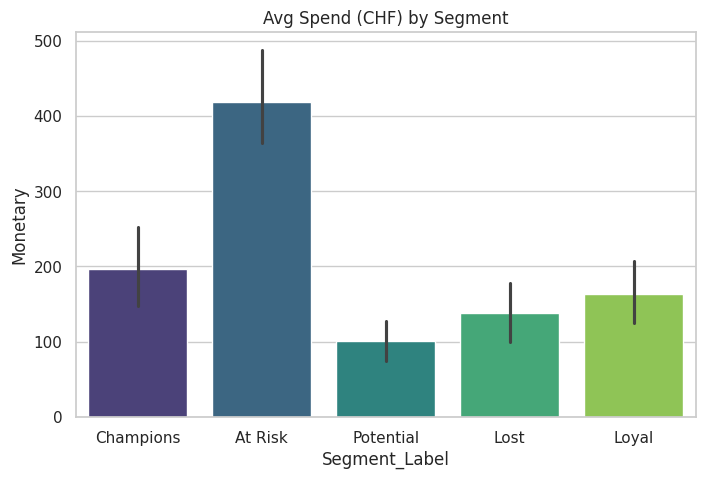

/tmp/ipython-input-3788359918.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment_Label', y='Return_Rate', data=customer_agg, palette='Reds')


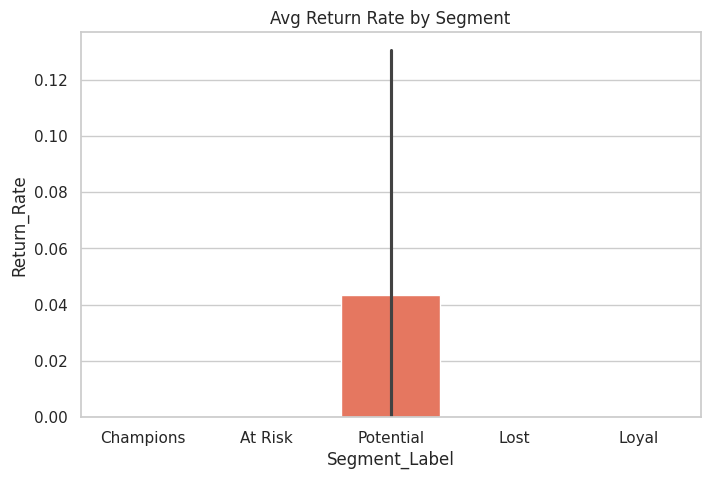

In [34]:
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Load the three tables (update paths)
sales = pd.read_csv('/content/sales_table-sheet1-sourcetable.csv')
customers = pd.read_csv('/content/customer_table-sheet1-sourcetable.csv')
products = pd.read_csv('/content/product_table-sheet1-sourcetable.csv')

# Step 1: Merge into one DF (Sales core)
df = sales.merge(customers, on='Customer_ID', how='left')  # Add demographics
df = df.merge(products, on='Product_ID', how='inner')     # Add product info

# Quick check: Main columns causing segmentation
print("Merged DF Columns:", df.columns.tolist())
# Output example: ['Sale_ID', 'Date', 'Product_ID', ..., 'Gender', 'Age', ..., 'Category', 'Cost_Price_CHF', ...]

# Step 2: Basic cleaning and encoding prep
df['Date'] = pd.to_datetime(df['Date'])  # Encode date for recency
df['Is_Return'] = df['Quantity'] < 0     # Flag returns
df['Profit_per_Unit'] = df['Selling_Price_CHF'] - df['Cost_Price_CHF']  # Profit driver

# Encode categoricals early (for later clustering)
le_gender = LabelEncoder()
df['Gender_Encoded'] = le_gender.fit_transform(df['Gender'].fillna('Unknown'))

le_loyalty = LabelEncoder()
df['Loyalty_Encoded'] = le_loyalty.fit_transform(df['Loyalty_Status'].fillna('None'))

le_channel = LabelEncoder()
df['Channel_Encoded'] = le_channel.fit_transform(df['Channel'])

# Step 3: Derive main features (group by Customer_ID)
current_date = df['Date'].max()

# RFM + extras
customer_agg = df.groupby('Customer_ID').agg(
    Recency=('Date', lambda x: (current_date - x.max()).days),  # Days since last buy
    Frequency=('Sale_ID', 'count'),                             # Buy count
    Monetary=('Total_Price_CHF', 'sum'),                        # Total spend
    Avg_Discount=('Discount_CHF', 'mean'),                      # Discount habits
    Return_Rate=('Is_Return', 'mean'),                          # % returns (loss signal)
    Avg_Profit_per_Buy=('Profit_per_Unit', 'mean'),             # Profit from their buys
    Visit_Frequency=('Visit_Frequency_per_month', 'first'),    # From customers
    Age=('Age', 'first'),
    Gender=('Gender_Encoded', 'first'),
    Loyalty=('Loyalty_Encoded', 'first'),
    Preferred_Category=('Category', lambda x: x.mode()[0] if not x.mode().empty else 'None'),  # Top category
    Preferred_Channel=('Channel_Encoded', 'first')
).reset_index()

# Add Town if useful (mode)
town_mode = df.groupby('Customer_ID')['Town'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown').reset_index()
customer_agg = customer_agg.merge(town_mode, on='Customer_ID')

print("Main Features DF Sample:", customer_agg.head())

# Step 4: Scale and Cluster (segmentation)
features_for_clustering = ['Recency', 'Frequency', 'Monetary', 'Return_Rate', 'Avg_Profit_per_Buy',
                           'Visit_Frequency', 'Age', 'Gender', 'Loyalty']  # Main drivers

# Fill missing values with the mean
customer_agg[features_for_clustering] = customer_agg[features_for_clustering].fillna(customer_agg[features_for_clustering].mean())


scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_agg[features_for_clustering])

kmeans = KMeans(n_clusters=5, random_state=42)  # 5 segments
customer_agg['Segment'] = kmeans.fit_predict(scaled_features)

# Map to labels (check means to assign, e.g., high Monetary=Champions)
segment_means = customer_agg.groupby('Segment')[['Monetary', 'Frequency', 'Recency']].mean()
print("Segment Means:", segment_means)  # Analyze to label manually

# Example manual labels (adjust based on your output)
segment_labels = {0: 'Lost', 1: 'At Risk', 2: 'Potential', 3: 'Loyal', 4: 'Champions'}
customer_agg['Segment_Label'] = customer_agg['Segment'].map(segment_labels)

# Save or export
customer_agg.to_csv('customer_segments.csv', index=False)
print(customer_agg['Segment_Label'].value_counts())  # Segment sizes

# Step 5: Quick Viz (two charts)
# Chart 1: Avg Monetary by Segment
plt.figure(figsize=(8,5))
sns.barplot(x='Segment_Label', y='Monetary', data=customer_agg, palette='viridis')
plt.title('Avg Spend (CHF) by Segment')
plt.show()

# Chart 2: Return Rate by Segment
plt.figure(figsize=(8,5))
sns.barplot(x='Segment_Label', y='Return_Rate', data=customer_agg, palette='Reds')
plt.title('Avg Return Rate by Segment')
plt.show()